In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hfgtools import *

In [22]:
mpo = gpd.read_file(r'T:\Tableau\tableauTitleVI\Datasources\MPO_BG_TitleVI.shp')

In [6]:
am_gdf = gpd.read_file(path+'\\output\\application_members.shp')

In [7]:
amu_gdf = am_gdf.drop_duplicates(subset=['ID'])

In [8]:
amu_gdf.columns

Index(['KeyMember', 'KeyID', 'NameLast', 'NameMiddle', 'NameFirst', 'SSN',
       'DOB', 'Sex', 'Disabled', 'Relatship', 'Citizship', 'Race', 'Ethnicity',
       'Age', 'ID', 'RaceNotes', 'MultiRace', 'White', 'African', 'IndianAlsk',
       'Asian', 'HawaiianOr', 'RaceOther', 'Race2', 'CitizNotes', 'EthniNotes',
       'AgeNotes', 'DisaNotes', 'Language', 'HHSize', 'IncAnnual', 'MailAdr1',
       'MailAdr2', 'MailCity', 'MailState', 'MailZIP', 'MailZIP4', 'LegalAdr1',
       'LegalAdr2', 'LegalCity', 'LegalState', 'LegalZIP', 'LegalZIP4',
       'Address', 'geometry'],
      dtype='object')

In [9]:
amu_gdf.CitizNotes.value_counts().rename_axis('Citizship').reset_index(name='Counts')

,Citizship,Counts
0,Eligible Citizen,11019
1,Eligible Non-Citizen,222
2,Ineligible Noncitizen,57
3,Pending Verification,31
4,Ineligible Child of head of household,3
5,No Documentation Submitted,3


In [11]:
amu_gdf['Foreigner'] = np.where(amu_gdf['CitizNotes'] == 'Eligible Citizen', 0, 1)

In [12]:
amu_gdf['Elderly'] = np.where(amu_gdf['Age'] > 65, 1, 0)

In [13]:
amu_gdf['Minor'] = np.where(amu_gdf['Age'] < 18, 1, 0)

In [15]:
amu_gdf['Female'] = np.where(amu_gdf['Sex'] == 'F', 1, 0)

In [16]:
amu_gdf['Poverty'] = amu_gdf[['HHSize', 'IncAnnual']].apply(lambda row: poverty(x=row.HHSize, y=row.IncAnnual), axis=1)

In [18]:
amu_gdf['Poverty'] = np.where(amu_gdf['Poverty'] == 'Below poverty level', 1, 0)

In [27]:
oa_gdf = gpd.read_file(path+'\\output\\online_application.shp')

In [29]:
out = combine_counts_pip(pntlist=[amu_gdf[amu_gdf.Elderly==1], 
                                  amu_gdf[amu_gdf.Disabled==1],
                                  amu_gdf[amu_gdf.Poverty==1],
                                  amu_gdf[amu_gdf.White==0],
                                  amu_gdf[amu_gdf.Minor==1],
                                  amu_gdf[amu_gdf.Female==1],
                                  amu_gdf[amu_gdf.Foreigner==1],
                                  amu_gdf,
                                  oa_gdf],
                                  polygon=mpo, 
                                  idcol='BlkGrp20', 
                                  cntnmlist=['ElderlyCNT', 
                                             'DisableCNT',
                                             'PovertyCNT', 
                                             'PoColorCNT',
                                             'MinorsCNT', 
                                             'FemaleCNT',
                                             'ForeignCNT',
                                             'AMCNT',
                                             'OACNT'],k=9)

In [30]:
out.columns

Index(['BlkGrp20', 'PctInside', 'TotalPOP', 'PopEld', 'PctElderly', 'PctDisab',
       'PopNInst5', 'PopNI5Disa', 'HHPop', 'GQPop', 'TotalDU', 'Occupancy',
       'HH', 'HHPoor', 'PctPoor', 'PctMinor', 'PopMinor', 'PopWrkF16',
       'PopWFUnEmp', 'PctUnEmp', 'HHsize', 'PopGE5', 'Pop5yrLEP', 'PctLEP',
       'RenterHHs', 'OwnHHNoCar', 'RntHHNoCar', 'PctHH0car', 'HH0car',
       'PctRentHH', 'Elderly', 'Disabled', 'Poor', 'Minority', 'UnEmp', 'LEP',
       'HHzerocar', 'Renter', 'ComofConce', 'UGB', 'geometry', 'ElderlyCNT',
       'DisableCNT', 'PovertyCNT', 'PoColorCNT', 'MinorsCNT', 'FemaleCNT',
       'ForeignCNT', 'AMCNT', 'OACNT'],
      dtype='object')

In [33]:
out[out.AMCNT>20][['ElderlyCNT', 'DisableCNT','PovertyCNT', 'PoColorCNT',
                   'MinorsCNT','FemaleCNT','ForeignCNT', 'AMCNT','OACNT']].tail(3)

,ElderlyCNT,DisableCNT,PovertyCNT,PoColorCNT,MinorsCNT,FemaleCNT,ForeignCNT,AMCNT,OACNT
186,1.0,8.0,8.0,8.0,8.0,18.0,NaN,28.0,76.0
188,1.0,14.0,15.0,1.0,5.0,17.0,NaN,28.0,47.0
189,1.0,16.0,60.0,18.0,35.0,42.0,NaN,84.0,210.0


In [36]:
import matplotlib.pyplot as plt

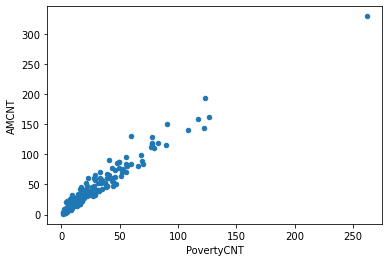

In [37]:
out.plot(x='PovertyCNT', y='AMCNT', kind = 'scatter');
plt.show() 

In [38]:
out[['PovertyCNT', 'AMCNT']].corr()

,PovertyCNT,AMCNT
PovertyCNT,1.000000,0.972989
AMCNT,0.972989,1.000000


In [39]:
newpath = path+'\\output\\bg'

In [40]:
out[[x for x in out.columns if len(x)<=10]].to_file(newpath+f'\\bg_counts_all.shp')  